# Promoter Test

In this experiment, we have tried three different candidate promoters: Arabinose, Lac (via IPTG) annd Rhamnose

In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '../')
import BrasilUSP_iGEM_LabLib as LabLib

import scipy.stats
import pylab as pl
import numpy as np
import glob
from math import sqrt



## Definitions...

def biolrepl(wells):
    return np.array( [ wells[0:3].mean(), wells[3:6].mean(), wells[6:9].mean() ] ), \
        np.array( [ np.std(wells[0:3]), np.std(wells[3:6]), np.std(wells[6:9]) ] )

ColumnNames = {
    'A' : "-control",
    'B' : "+control",
    'C' : "J23106",
    'D' : "J23117",
    'E' : "ZeroInd1",
    'F' : "ZeroInd2",
    'G' : "Induced1",
    'H' : "Induced2"
}
MeaningColNames = {v : k for k, v in ColumnNames.items()}

ColColors = { '-control' : (1.0,0.5,0.3), '+control' : (1.0,0.3,0.5), 
              'J23106' : (0.3,1.0,0.5), 'J23117' : (0.3,0.5,1.0),
              'ZeroInd1' : (0.3,1.0,0.5), 'ZeroInd2' : (0.3,1.0,0.5),
              'Induced1' : (0.3,0.5,1.0), 'Induced2' : (0.3,0.5,1.0)
            }
lightColColors = {
              '-control' : (1.0,0.7,0.5), '+control' : (1.0,0.5,0.7), 
              'J23106' : (0.5,1.0,0.7), 'J23117' : (0.5,0.7,1.0),
              'ZeroInd1' : (0.5,1.0,0.7), 'ZeroInd2' : (0.5,1.0,0.7),
              'Induced1' : (0.5,0.7,1.0), 'Induced2' : (0.5,0.7,1.0)
            }


def allCols(labels, r0 = 1, rf = 9):
    if type(labels) != list: 
        labels = [labels]
    cols = []
    for label in labels:
        row  = MeaningColNames[label]
        for j in range(r0,rf+1):
            cols.append(row + '0' + str(j))
    return cols

### Reading measurements

In [2]:
FLlist = []
ODlist = []

for j in range(10):
    FLlist.append( 'Fluorescence/Fluo ' + str(j) + '.txt' )
    ODlist.append( 'OD/OD ' + str(j) + '.txt' )


fldata = LabLib.ReadFluor_timefmt_nanomed(FLlist)
oddata = LabLib.ReadFluor_timefmt_nanomed(ODlist)

In [3]:
fldata[allCols('-control')].head(3)

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,640.231,733.842,713.911,722.936,679.395,695.576,742.541,829.073,982.955
1,650.724,757.078,717.807,714.403,697.980,706.559,757.134,846.948,951.730
2,642.982,697.624,675.377,686.211,698.965,709.513,769.018,859.699,1101.527


In [4]:
oddata[allCols('-control')].head(3)

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,0.1764,0.2155,0.1685,0.1723,0.1659,0.1817,0.1922,0.1740,0.1779
1,0.4332,0.4884,0.4209,0.4371,0.4219,0.4684,0.4749,0.4412,0.4540
2,0.5840,0.6502,0.5975,0.6191,0.6014,0.6883,0.6991,0.6779,0.6767


Since we have three different plates, one for each promoter, let's quickly check the temperature in each plate separately.

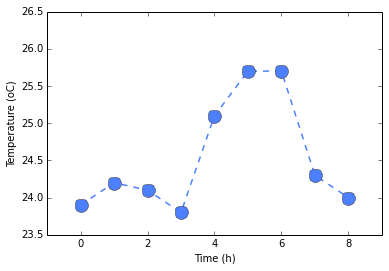

In [5]:
pl.plot(fldata['T(oC)'], 'o--', lw=1.5, markersize=13., 
            color=(0.3,0.5,1.0), markeredgecolor=(0.2,0.2,0.2))

pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('Temperature (oC)')
pl.ylim(23.5,26.5)
pl.show()

Temperature seems quite reasonable accross different boards.

## HokD action - OD

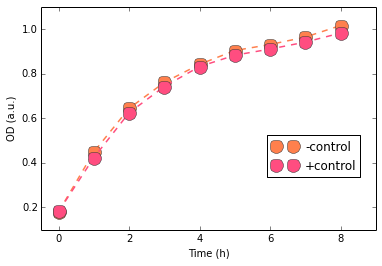

In [6]:
for col in ['-control', '+control']:
    pl.plot(np.mean(np.array(oddata[allCols(col)]), axis=1), 
        'o--', lw=1.5, markersize=13., color=ColColors[col], markeredgecolor=(0.2,0.2,0.2), label=col)

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('OD (a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.45))
pl.show()
pl.show()

### Checking for possible OD > 1 cases

In [7]:
print 'Minimum larger than 1: ', oddata[oddata > 1][allCols(MeaningColNames.keys())].min().min()
print 'Maximum larger than 1: ', oddata[oddata > 1][allCols(MeaningColNames.keys())].max().max()

Minimum larger than 1:  1.0006
Maximum larger than 1:  1.0913


Let's check only those with respect to hokD expression.

In [8]:
IntCols = ['-control', 'ZeroInd1', 'ZeroInd2', 'Induced1', 'Induced2']
print 'Minimum larger than 1: ', oddata[oddata > 1][allCols(IntCols)].min().min()
print 'Maximum larger than 1: ', oddata[oddata > 1][allCols(IntCols)].max().max()

Minimum larger than 1:  1.0006
Maximum larger than 1:  1.0913


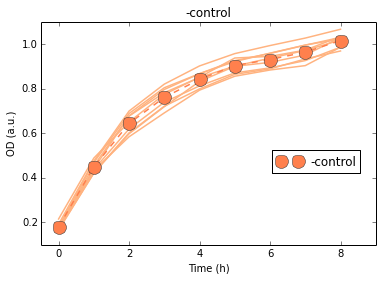

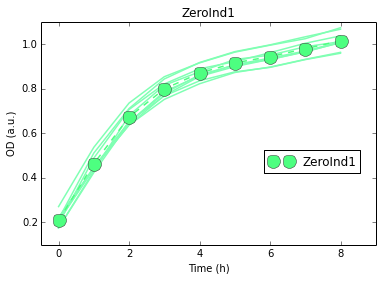

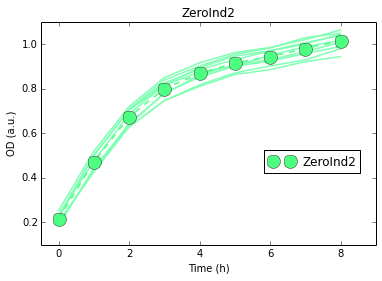

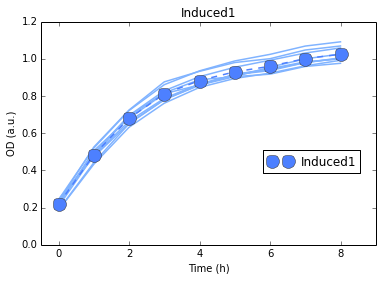

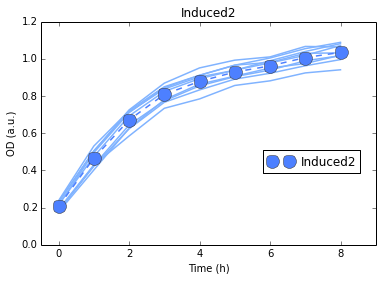

In [9]:
for col in IntCols:
    pl.title(col)
    pl.plot(np.array(oddata[allCols(col)]), 
        '-', lw=1.5, markersize=13., color=lightColColors[col], markeredgecolor=(0.2,0.2,0.2))

    pl.plot(np.mean(np.array(oddata[allCols(col)]), axis=1), 
        'o--', lw=1.5, markersize=13., color=ColColors[col], markeredgecolor=(0.2,0.2,0.2), label=col)

    pl.xlabel('Time (h)')
    pl.xlim(-0.5,9.)
    pl.ylabel('OD (a.u.)')
    pl.legend(bbox_to_anchor=(0.97, 0.45))
    pl.show()

### Standard-deviations

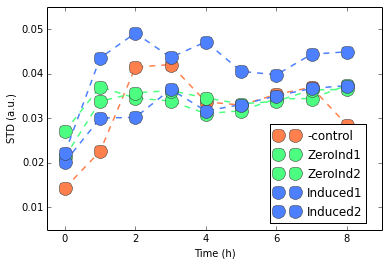

In [10]:
for col in IntCols:
    pl.plot(np.std(np.array(oddata[allCols(col)]), axis=1), 
        'o--', lw=1.5, markersize=13., color=ColColors[col], markeredgecolor=(0.2,0.2,0.2), label=col)

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('STD (a.u.)')
pl.ylim(0.005,0.055)
pl.legend(bbox_to_anchor=(0.97, 0.5))
pl.show()

### Comparing induced vs non-induced colonies

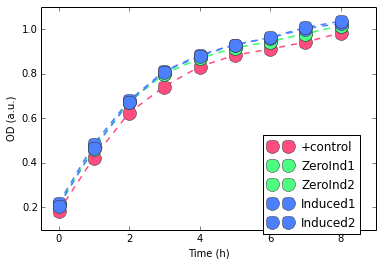

In [11]:
for col in ['+control', 'ZeroInd1', 'ZeroInd2', 'Induced1', 'Induced2']:
    pl.plot(np.mean(np.array(oddata[allCols(col)]), axis=1), 
        'o--', lw=1.5, markersize=13., color=ColColors[col], markeredgecolor=(0.2,0.2,0.2), label=col)

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('OD (a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.45))
pl.show()
pl.show()

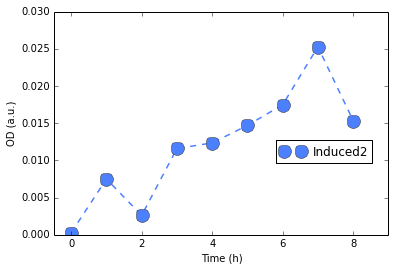

In [12]:
ZeroTrace = np.mean(np.array(oddata[allCols('ZeroInd1')]), axis=1)/2.
ZeroTrace += np.mean(np.array(oddata[allCols('ZeroInd2')]), axis=1)/2.
Induced = np.mean(np.array(oddata[allCols('Induced1')]), axis=1)/2.
Induced += np.mean(np.array(oddata[allCols('Induced2')]), axis=1)/2.

pl.plot(Induced - ZeroTrace, 
        'o--', lw=1.5, markersize=13., color=ColColors[col], markeredgecolor=(0.2,0.2,0.2), label=col)

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('OD (a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.45))
pl.show()
pl.show()

Since this difference is basically within the experimental error, it seems we should disregard this experiment. 

# Characterization of our new part - linker+GFP

Checking the OD against the controls

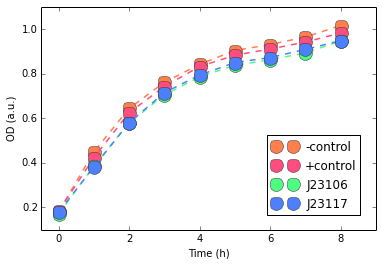

In [13]:
for col in ['-control', '+control', 'J23106', 'J23117']:
    pl.plot(np.mean(np.array(oddata[allCols(col)]), axis=1), 
        'o--', lw=1.5, markersize=13., color=ColColors[col], markeredgecolor=(0.2,0.2,0.2), label=col)

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('OD (a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.45))
pl.show()
pl.show()

Both devices have lower ODs than the controls, which are expected!

Next, let's check the fluorescence.

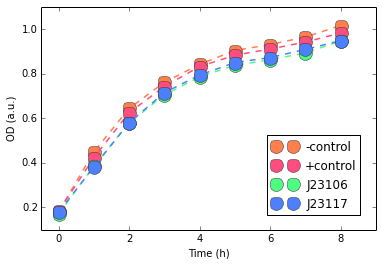

In [14]:
for col in ['-control', '+control', 'J23106', 'J23117']:
    pl.plot(np.mean(np.array(oddata[allCols(col)]), axis=1), 
        'o--', lw=1.5, markersize=13., color=ColColors[col], markeredgecolor=(0.2,0.2,0.2), label=col)

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('OD (a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.45))
pl.show()
pl.show()

In [15]:
NormedOD = {}
IntCols = ['-control', '+control', 'J23106', 'J23117']

for col in IntCols:
    NormedOD[col] = np.mean(np.array(fldata[allCols(col)]) / np.array(oddata[allCols(col)]), axis=1)

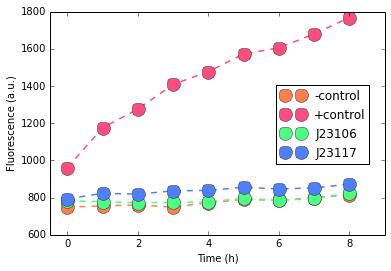

In [16]:
for col in IntCols:
    pl.plot(np.mean(np.array(fldata[allCols(col)]), axis=1), 
        'o--', lw=1.5, markersize=13., color=ColColors[col], markeredgecolor=(0.2,0.2,0.2), label=col)

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('Fluorescence (a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.7))
pl.show()
pl.show()

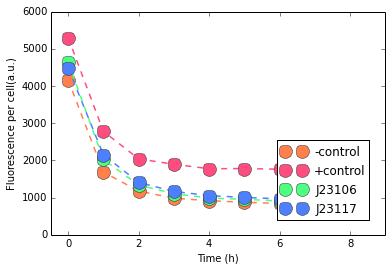

In [17]:
for col in IntCols:
    pl.plot(NormedOD[col], 
        'o--', lw=1.5, markersize=13., color=ColColors[col], markeredgecolor=(0.2,0.2,0.2), label=col)

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('Fluorescence per cell(a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.45))
pl.show()
pl.show()

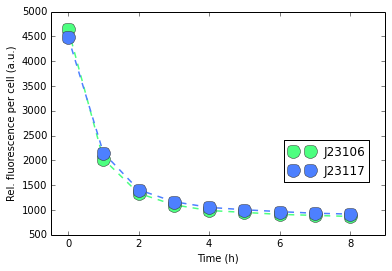

In [18]:
Normed = {}
IntCols_ = ['J23106', 'J23117']
for col in IntCols_:
    Normed[col] = NormedOD[col] / NormedOD['+control']

for col in IntCols_:
    pl.plot(NormedOD[col], 
        'o--', lw=1.5, markersize=13., color=ColColors[col], markeredgecolor=(0.2,0.2,0.2), label=col)

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('Rel. fluorescence per cell (a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.45))
pl.show()
pl.show()

Something is definitely wrong... =(